![uc3m](img/uc3m.jpg)

# The Coordinated Descent and the Lasso

<a href="http://www.est.uc3m.es/nogales" target="_blank">Javier Nogales</a>

## Summary

The general framework in machine learning and statistics is:

Data = Model + Noise

In Statistics, the Model is usually known up to some parameters, whereas in Machine Learning the Model is learnt through the data.

Consider the following linear model and data:
$$y=\beta_{0}+\beta_{1}x_1+\dots+\beta_{p}x_p+e$$
where $e\sim N(0,\sigma^{2})$

We will learn how to apply the Coordinate Descent method to the Lasso regression

<img src="img/CD.png" width="350">



### A dataset

We will use the diabetes dataset from Sklearn, but you can choose any other


In [4]:
import numpy as np
import pandas as pd
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
Y = diabetes.target.reshape(-1,1)


Fit a linear relation between a set of variables ($X$) with respect to a response variable ($y$)

Model: $y = X\beta + u$

Classical estimation: least squares

  \begin{align*}
\text{minimize}\quad & \frac{1}{n}||y-X\beta||_2^2
\end{align*}

The LS solution using textbook formula is: $\beta_{ls}=(X^T X)^{-1}X^T y$

In [5]:
beta_ols=np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.transpose(X)),Y)
print(beta_ols)

[[ -10.0098663 ]
 [-239.81564367]
 [ 519.84592005]
 [ 324.3846455 ]
 [-792.17563855]
 [ 476.73902101]
 [ 101.04326794]
 [ 177.06323767]
 [ 751.27369956]
 [  67.62669218]]


### The Coordinated Descent for the Lasso

The loss function is $l(\beta)=\frac{1}{2}||y-X\beta||_2^2 + \lambda ||\beta||_1=\frac{1}{2}\sum_{i=1}^n(y_i-\beta' x_i)^2+ \lambda ||\beta||_1$, hence the sub-gradient is

$$
  g_k = \nabla l(w) = -X'(y-X\beta) + \lambda \partial_\beta ||\beta||_1
$$

Note this is not a gradient because the absolute value is non-differentiable

We need to use the subdifferential: any slope value that is less than the actual slope value between two points

The subdifferential of the absolute value is:
$$
  \partial |\beta_i| = \begin{cases}-1 & \text{if} \beta_i<0\\
  [-1, 1] & \text{if} \beta_i=0 \\
  +1 & \text{if} \beta_i>0\end{cases}
$$

The framework of the algorithm:

<img src="img/CDlasso.png" width="450" align="left">



### The algorithm in Python:

It uses a subgradient of the loss $l(\beta)$, which is called the soft threshold

In [6]:
def soft_threshold(rho,lamda):
    '''Soft threshold function used for normalized data.
    Normalize means the 2-norm of each predictor is = 1'''
    if rho < - lamda:
        return (rho + lamda)
    elif rho >  lamda:
        return (rho - lamda)
    else: 
        return 0
    

def coordinate_descent_lasso(beta,X,y,lamda = .01, num_iters=100, intercept = False):
    '''Coordinate gradient descent for lasso regression - for normalized data. 
    The intercept parameter allows to specify whether or not we regularize beta_0'''
    
    # Initialization 
    m,n = X.shape
    X = X / (np.linalg.norm(X,axis = 0)) # normalizing X in case it was not done before
    
    # Repeat until max number of iterations
    for i in range(num_iters):
        
        # Repeat through each coordinate
        for j in range(n):
            
            # The gradient of the ols part
            X_j = X[:,j].reshape(-1,1)
            y_pred =  X @ beta
            rho = X_j.T @ (y - y_pred  + beta[j]*X_j) 
            # if beta = 0
            # if beta < 0 
            # if beat > 0 
        
            # We add now the subgradient of the lasso part
            if intercept == True:  
                if j == 0: 
                    beta[j] =  rho 
                else:
                    beta[j] =  soft_threshold(rho, lamda)  

            if intercept == False:
                beta[j] =  soft_threshold(rho, lamda)   
            
    return beta.flatten()


### The Lasso path

In [7]:
# Initialize variables
X / np.linalg.norm(X,axis=0)  # Standardize data (easier to set the l1_ratio parameter)
m,n = X.shape # m -> number of columns
initial_beta = np.zeros((n,1))
beta_list = list()
lamda = np.logspace(0,4,50)/10 # Grid of lambda values

# lasso regression for each lambda
for l in lamda:
    beta_l = coordinate_descent_lasso(initial_beta,X,Y,lamda = l, num_iters=100)
    beta_list.append(beta_l)

beta_lasso = np.stack(beta_list).T



(0.06309573444801933, 1584.893192461114, -840.3718916261935, 816.7872896189365)

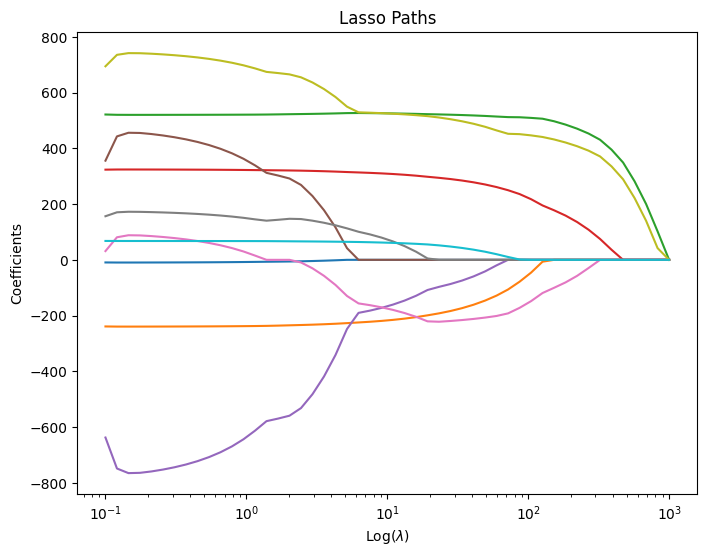

In [8]:
from matplotlib import pyplot as plt

# Plot results
n,_ = beta_lasso.shape
plt.figure(figsize = (8,6))

for i in range(n):
    plt.plot(lamda, beta_lasso[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('Coefficients')
plt.title('Lasso Paths')
plt.axis('tight')

### How do you find the best model???
- Try 50 lambdas and find the best model
- Using the model predict

# Exercise

Apply the same algorithms to a logistic regression problem, or other machine learning tool that can be defined using a loss function.

In [ ]:
# Same algorithm 
# Different gradient
# Use SVM


def soft_threshold(rho,lamda):
    '''Soft threshold function used for normalized data.
    Normalize means the 2-norm of each predictor is = 1'''
    if rho < - lamda:
        return (rho + lamda)
    elif rho >  lamda:
        return (rho - lamda)
    else: 
        return 0
    

def coordinate_descent_lasso(beta,X,y,lamda = .01, num_iters=100, intercept = False):
    '''Coordinate gradient descent for lasso regression - for normalized data. 
    The intercept parameter allows to specify whether or not we regularize beta_0'''
    
    # Initialization 
    m,n = X.shape
    X = X / (np.linalg.norm(X,axis = 0)) # normalizing X in case it was not done before
    
    # Repeat until max number of iterations
    for i in range(num_iters):
        
        # Repeat through each coordinate
        for j in range(n):
            
            # Change ---
            # The gradient of the ols part
            X_j = X[:,j].reshape(-1,1)
            y_pred =  X @ beta
            rho = X_j.T @ (y - y_pred  + beta[j]*X_j) 
            # Change ---
        
            # We add now the subgradient of the lasso part
            if intercept == True:  
                if j == 0: 
                    beta[j] =  rho 
                else:
                    beta[j] =  soft_threshold(rho, lamda)  

            if intercept == False:
                beta[j] =  soft_threshold(rho, lamda)   
            
    return beta.flatten()
